<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_29_Analisis_Descriptivo_Multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center">
  <img src="https://raw.githubusercontent.com/lacamposm/Diplomado_Metodos_UCentral/main/data/images/imagen_ucentral.jpg" alt="logo_Ucentral" width="400px" height="300px">
</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
##
sns.set_theme()

## ***Cereal***

Vamos a cargar la base de datos de Cereal, que contiene información nutricional de diferentes marcas de cereales.

In [ ]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
path_csv = "Cereal.csv"
df = pd.read_csv(url_base + path_csv, sep=";", decimal=",", index_col=0)
df.head()

,Fabrica,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio,Vitaminas
Cereal,,,,,,,,,,
100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,848.48485,enriched
All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,969.69697,enriched
All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,660.00000,enriched
Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,93.33333,enriched
Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,30.00000,enriched


Observamos los tipos de datos en cada una de las columna del DataFrame.

In [ ]:
df.dtypes

Fabrica           object
Calorias         float64
Proteina         float64
Grasa            float64
Sodio            float64
Fibra            float64
Carbohidratos    float64
Azucares         float64
Potasio          float64
Vitaminas         object
dtype: object

Con el método [`select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) podemos obtener las columnas cuyos valores son numéricos.

In [ ]:
df_numeric = df.select_dtypes(np.number)
df_numeric

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Cereal,,,,,,,,
100% Bran,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,848.48485
All-Bran,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,969.69697
All-Bran with Extra Fiber,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,660.00000
Apple Cinnamon Cheerios,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,93.33333
Apple Jacks,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,30.00000
...,...,...,...,...,...,...,...,...
Triples,146.66667,2.666667,1.333333,333.33333,0.000000,28.00000,4.000000,80.00000
Trix,110.00000,1.000000,1.000000,140.00000,0.000000,13.00000,12.000000,25.00000
Wheat Chex,149.25373,4.477612,1.492537,343.28358,4.477612,25.37313,4.477612,171.64179


In [ ]:
## Así mismo con las columnas de tipo "object"
df_object = df.select_dtypes(include=["object"])
df_object

,Fabrica,Vitaminas
Cereal,,
100% Bran,N,enriched
All-Bran,K,enriched
All-Bran with Extra Fiber,K,enriched
Apple Cinnamon Cheerios,G,enriched
Apple Jacks,K,enriched
...,...,...
Triples,G,enriched
Trix,G,enriched
Wheat Chex,R,enriched


Vamos a recoger en un lista los nombres de las columnas que son de tipo "numerico".

#### ***Ejercicio 1.***

En un lista ubique todos los nombre de las columnas que son de tipo "numerico". Piense en que el numéro de _features_ podría ser banstante grande.

***Respuesta:***

In [ ]:
## Celda de código para probar.
features_numeric = [feature for feature in df_numeric.columns]
features_numeric

['Calorias',
 'Proteina',
 'Grasa',
 'Sodio',
 'Fibra',
 'Carbohidratos',
 'Azucares',
 'Potasio']

Así mismo lo podemos hacer para las no numéricas.

#### ***Ejercicio 2.***

Solucione el mismo problema que en el ***Ejercicio 1*** pero con las varibles de tipo "object".

***Respuesta:***

In [ ]:
## Celda de código para probar.
features_categories = [feature for feature in df_object.columns]
features_categories

['Fabrica', 'Vitaminas']

## ***Matriz de covarianzas y de correlación.***

Cuando se tiene un conjunto de variables cuantitativas, por cada par de ellas se calcula la covarianza:

$$Cov(X,Y)=\frac{1}{n-1}\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})$$

Estos valores conformarán la matriz de covarianzas.
El coeficiente de correlación lineal se define como:

$$\rho_{XY}=\frac{Cov(X;Y)}{sd(X)sd(Y)}$$


In [ ]:
## Matriz de varianzas-covarianzas
df_numeric.cov()

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Calorias,3895.242099,116.442850,60.674383,4310.041188,148.608725,416.865952,180.380317,5362.723526
Proteina,116.442850,6.983432,1.790252,197.706130,13.122839,12.243296,2.850421,401.040187
Grasa,60.674383,1.790252,2.713399,55.851817,2.284043,2.550715,3.995474,96.005854
Sodio,4310.041188,197.706130,55.851817,17064.098428,396.983157,468.557877,161.021552,13109.507474
Fibra,148.608725,13.122839,2.284043,396.983157,37.618644,10.547819,5.329678,1065.826587
Carbohidratos,416.865952,12.243296,2.550715,468.557877,10.547819,71.714955,-2.017438,369.551907
Azucares,180.380317,2.850421,3.995474,161.021552,5.329678,-2.017438,34.050018,285.976158
Potasio,5362.723526,401.040187,96.005854,13109.507474,1065.826587,369.551907,285.976158,32503.973299


In [ ]:
### Matriz de correlación lineal de pearson
df_numeric.corr().round(4)

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Calorias,1.0000,0.7060,0.5902,0.5287,0.3882,0.7887,0.4953,0.4766
Proteina,0.7060,1.0000,0.4113,0.5727,0.8096,0.5471,0.1848,0.8418
Grasa,0.5902,0.4113,1.0000,0.2596,0.2261,0.1829,0.4157,0.3233
Sodio,0.5287,0.5727,0.2596,1.0000,0.4955,0.4236,0.2112,0.5566
Fibra,0.3882,0.8096,0.2261,0.4955,1.0000,0.2031,0.1489,0.9639
Carbohidratos,0.7887,0.5471,0.1829,0.4236,0.2031,1.0000,-0.0408,0.2420
Azucares,0.4953,0.1848,0.4157,0.2112,0.1489,-0.0408,1.0000,0.2718
Potasio,0.4766,0.8418,0.3233,0.5566,0.9639,0.2420,0.2718,1.0000


La matriz anterior muestra la relación lineal entre cada par de variables, por su supuesto en la diagonal principal tenemos la correlación de la variable con ella misma, es decir 1.

#### ***Ejercicio 3.***

Haga uso de `plotly_express` para construir un scatter plot de las siguientes variables:

- Potasio vs. Fibra



In [ ]:
## Celda de código para probra.
## Grafico de fibra y potasio.
fig = px.scatter(df_numeric, x = df_numeric.Potasio, y = df_numeric.Fibra,
                 hover_name = df_numeric.index, trendline = "ols", trendline_color_override = "red")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


La relación de las variables anteriores muestra que al parecer a mayor contenido de Potasio se incrementa la fibra.

#### ***Ejercicio 4.***

Obtenga el valor de esta correlación haciendo uso de código.

***Respuesta:***


In [ ]:
## Celda de código para probar.
corr = df_numeric.corr().round(4).loc["Fibra","Potasio"]
print("La correlación de la variable Fibra y la variable Potasio es {:.3f}".format(corr))

La correlación de la variable Fibra y la variable Potasio es 0.964


Recuerde que muchas veces un plot dice más que mil palabras... Veamos la matriz de correlación con un mapa de calor

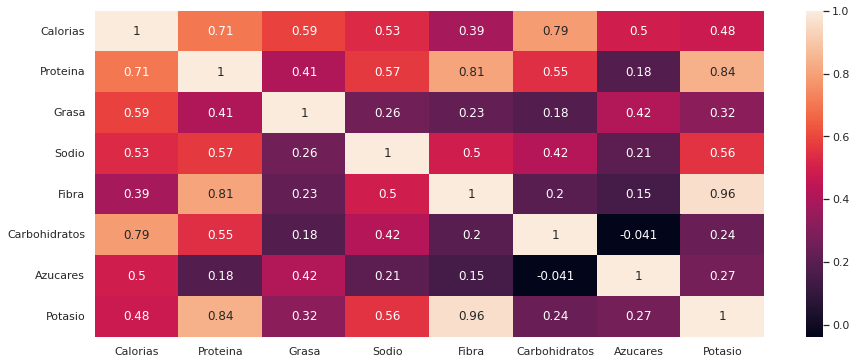

In [ ]:
## Mapa de calor de la matriz de correlación.
plt.figure(figsize=(15,6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

## ***Diagramas de dispersión***

El diagrama de dispersión sirve para visualizar relaciones entre un par de variables cuantitativas.


#### ***Ejercicio 5.***

Construya un `pairplot` de todas las variables numéricas en el conjunto de datos, y la diagonal presente un kde-plot.

***Respuesta:***


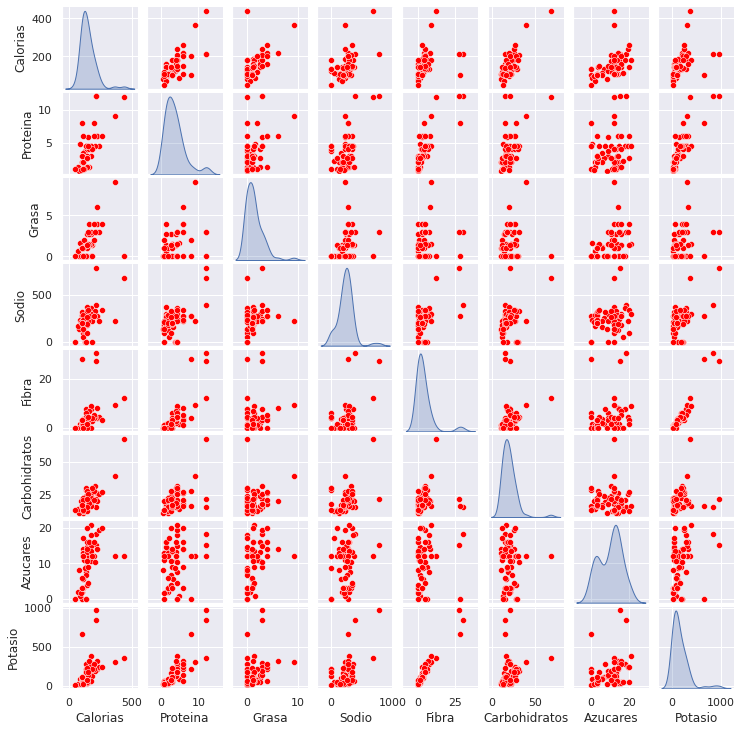

In [ ]:
## Celda de código para probar.
g = sns.pairplot(df_numeric, palette = "dark",diag_kind = "kde", plot_kws = {"color":"red"})
g.fig.set_size_inches(10,10)

Un plot más dinámico incluyendo el nombre del cereal lo podemos ver con el siguiente código:

In [ ]:
## Scatter plot entre Carbohidratos y Azucares. use hover_name = df.index
## Complete el siguiente código
## fig = px.?????(df, x = ???? , y = ????, ?????=?????)
## ???.show()

Replique los mismos gráficos mostrando un scatter-plot de:

- Potasio vs. Sodio
- Proteina vs. Fibra

In [ ]:
## Celda de código para probar.
fig = px.scatter(df, x = "Potasio", y = "Sodio", hover_name = df.index)
fig.show()

In [ ]:
## Celda de código para probar.
fig = px.scatter(df, x = "Proteina", y = "Fibra", hover_name = df.index)
fig.show()

## ***Tablas de contingencia.***

Vamos a hacer uso de [`pd.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) para construir una tabla de contingencia, recordando que dicha tabla contiene los conteos de una o más variables cualitativas.

In [ ]:
ifces_csv = "PruebaSaber1.csv"
df_icfes1 = pd.read_csv(url_base+ifces_csv, sep=";", encoding="latin1",low_memory=False)
df_icfes1.shape

(10000, 78)

In [ ]:
crosstab = pd.crosstab(df_icfes1["FAMI_CUARTOSHOGAR"], df_icfes1["FAMI_NIVEL_SISBEN"])
crosstab

FAMI_NIVEL_SISBEN,Esta clasificada en otro nivel del SISBEN,Estrato 1,Nivel 1,Nivel 2,Nivel 3,No est clasificada por el SISBEN
FAMI_CUARTOSHOGAR,,,,,,
Cinco,3,0,116,72,7,72
Cuatro,13,0,371,299,70,291
Diez o m s,0,0,1,3,1,3
Dos,35,0,1757,1059,199,758
Nueve,0,0,4,2,0,0
Ocho,0,0,7,5,1,5
Seis,0,0,38,22,4,21
Siete,0,0,11,10,1,6
Tres,47,0,1475,1076,276,936


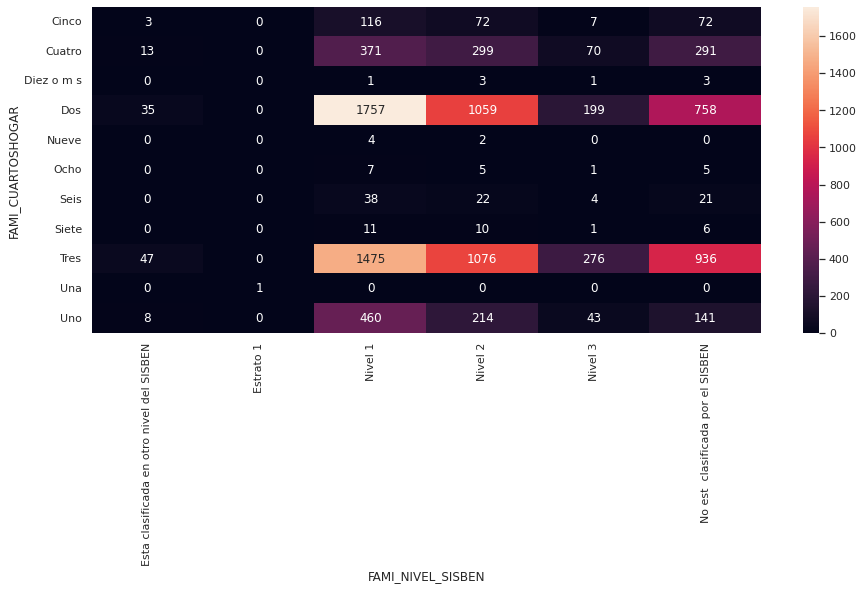

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(crosstab, annot=True,fmt=".0f")
plt.show()

#### ***Ejercicio 5.***

¿Que puede comentar del mapa de calor anterior?

#### ***Respuesta***

## ***Otros gráficos multivariados.***


In [ ]:
df_group = df_icfes1.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
df_group

FAMI_CUARTOSHOGAR  FAMI_NIVEL_SISBEN                        
Cinco              Esta clasificada en otro nivel del SISBEN       3
                   Nivel 1                                       116
                   Nivel 2                                        72
                   Nivel 3                                         7
                   No est  clasificada por el SISBEN              72
Cuatro             Esta clasificada en otro nivel del SISBEN      13
                   Nivel 1                                       371
                   Nivel 2                                       299
                   Nivel 3                                        70
                   No est  clasificada por el SISBEN             291
Diez o m s         Nivel 1                                         1
                   Nivel 2                                         3
                   Nivel 3                                         1
                   No est  clasificada por

In [ ]:
df_group = df_icfes1.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
df_group = df_group.reset_index(name="Conteo",)
df_group

,FAMI_CUARTOSHOGAR,FAMI_NIVEL_SISBEN,Conteo
0,Cinco,Esta clasificada en otro nivel del SISBEN,3
1,Cinco,Nivel 1,116
2,Cinco,Nivel 2,72
3,Cinco,Nivel 3,7
4,Cinco,No est clasificada por el SISBEN,72
5,Cuatro,Esta clasificada en otro nivel del SISBEN,13
6,Cuatro,Nivel 1,371
7,Cuatro,Nivel 2,299
8,Cuatro,Nivel 3,70
9,Cuatro,No est clasificada por el SISBEN,291


In [ ]:
fig = px.bar(df_group, x="FAMI_CUARTOSHOGAR", y="Conteo", color="FAMI_NIVEL_SISBEN")
fig.show()

#### ***Ejercicio 6.***

¿Observa lo mismo que en el mapa de calor, o quizá se observa información no percibida antes?

***Respuesta:***

En el repositorio de Github, tenemos más tablas de resultados del ICFES, vamos a importarlas todas y formar un único pandas DataFrame.

#### ***Ejercicio 7.***

Construya el `pd.DataFrame` solicitado en el párrafo anterior. Llame este DataFrame `df_icfes`.

In [ ]:
## Celda de código para probar.
url_main = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber"
##
df_icfes = pd.DataFrame()
for i in range(1,13):
  url = url_main + str(i) + ".csv"
  df_temp = pd.read_csv(url, sep = ";", encoding = "latin1", low_memory=False)
  print(url," Shape:",df_temp.shape)
  df_icfes = pd.concat([df_icfes,df_temp])

print("\nEl tamaño del Dataframe resultante es: {}".format(df_icfes.shape))

https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber1.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber2.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber3.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber4.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber5.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber6.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber7.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber8.csv  Shape: (10000, 78)
https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/PruebaSaber9.csv  Shape: (100

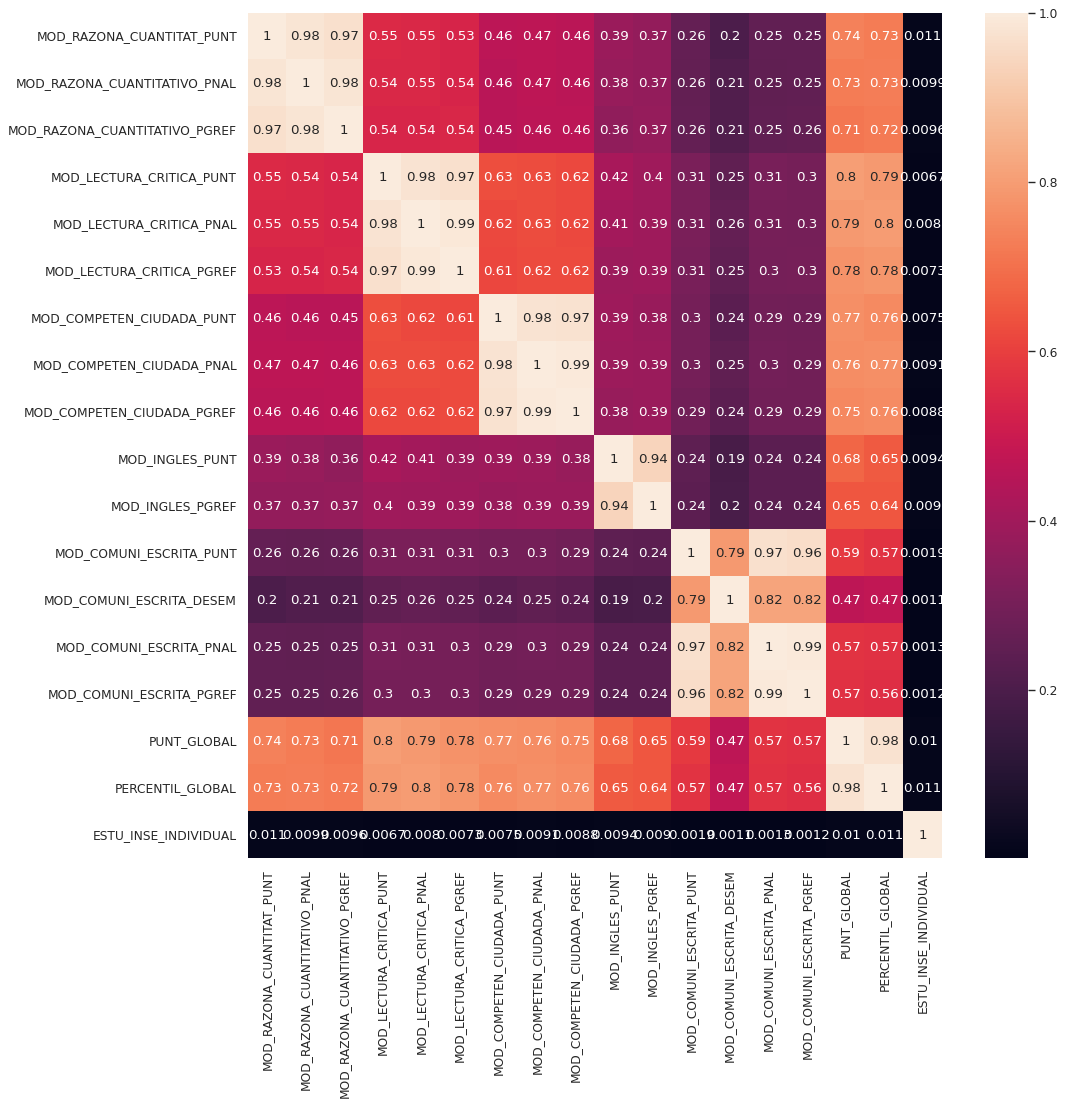

In [ ]:
corre = df_icfes.corr()
plt.figure(figsize=(14, 14), dpi=80)
sns.heatmap(corre,annot=True )
plt.show()

In [ ]:
fig = px.scatter(data_frame=df_icfes, x = "MOD_LECTURA_CRITICA_PUNT", y = "PUNT_GLOBAL",
                 title = "Scatter-plot: Puntaje Lectura crítica y Puntaje global")
fig.show()

#### ***Ejercicio 8.***

Construya con `plotly_express` un bar plot del conteo de elementos del cruce entre las variables `FAMI_CUARTOSHOGAR` y `FAMI_NIVEL_SISBEN`. En el eje $x$ debe estar la varible `FAMI_CUARTOSHOGAR` mientras que en el eje $y$ el conteo y distinguible por la variable  `FAMI_NIVEL_SISBEN`.

**Hint:** Use el parámetro `color="FAMI_NIVEL_SISBEN"`

In [ ]:
df_group1 = df_icfes.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
df_group1 = df_group1.reset_index(name="Conteo")
fig = px.bar(df_group1, x="FAMI_CUARTOSHOGAR", y="Conteo", color="FAMI_NIVEL_SISBEN")
fig.show()

In [ ]:
fig = px.scatter(df_icfes, x="MOD_RAZONA_CUANTITAT_PUNT", y="MOD_LECTURA_CRITICA_PUNT")
fig.show()

Vamos a considerar el DataFrame de las medias para los distintos grupos al cruzar las variables género del estudiante (`ESTU_GENERO`) y el departamento (`ESTU_INST_DEPARTAMENTO`)

In [ ]:
df_group2 = df_icfes.groupby(["ESTU_GENERO","ESTU_INST_DEPARTAMENTO"]).mean()
df_group2 = df_group2.reset_index()
df_group2

,ESTU_GENERO,ESTU_INST_DEPARTAMENTO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PGREF,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PGREF,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PGREF,MOD_INGLES_PUNT,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL
0,F,ANTIOQUIA,101.772414,53.034943,54.268046,105.693333,58.797241,58.834483,103.767356,55.794943,55.534713,102.144368,54.313103,106.400924,2.760739,59.833718,59.248961,103.862529,58.614713,100.549658
1,F,ATLANTICO,96.815789,45.671053,47.680099,99.495066,49.660362,50.739309,98.804276,48.567434,49.110197,100.341283,53.285362,100.752902,2.466003,51.095357,49.945274,99.069079,48.935033,133.363980
2,F,BOGOTA,96.969663,45.931150,46.851030,99.762009,50.002411,50.006228,100.119699,50.410588,50.068408,97.818383,48.282069,101.404134,2.529434,52.469595,51.670651,99.081668,49.123154,81.417541
3,F,"BOGOTµ, D.C.",11.000000,109.000000,66.000000,69.000000,129.000000,92.000000,93.000000,107.000000,62.000000,61.000000,66.000000,68.000000,118.000000,3.000000,82.000000,80.000000,114.000000,84.000000
4,F,BOLIVAR,95.093143,43.630286,43.432571,99.786857,50.230857,49.936571,98.901714,48.574286,48.072571,100.458286,50.823429,101.436563,2.524221,52.294694,51.540946,98.965143,48.772000,86.990817
5,F,BOYACA,96.460432,44.863309,46.924460,100.881295,51.410072,52.410072,102.143885,53.428058,53.906475,92.208633,42.607914,104.211679,2.664234,56.029197,54.861314,98.881295,48.568345,48.749746
6,F,BUCARAMANGA,68.000000,103.000000,55.000000,58.000000,103.000000,57.000000,57.000000,90.000000,31.000000,29.000000,10.000000,10.000000,116.000000,3.000000,79.000000,78.000000,97.000000,44.000000
7,F,CALDAS,94.621415,42.338432,47.434034,97.403442,46.806883,52.315488,97.296367,46.191205,51.388145,95.642447,50.070746,103.402724,2.626459,55.324903,59.120623,97.311663,45.468451,45.701468
8,F,CAQUETA,106.714286,59.642857,59.500000,115.357143,68.000000,64.000000,110.785714,61.214286,55.785714,95.857143,44.785714,122.857143,3.571429,84.000000,80.071429,110.214286,68.214286,49.708245
9,F,CAUCA,96.644231,45.043269,45.197115,96.764423,45.423077,47.317308,98.538462,47.923077,50.307692,94.750000,45.076923,99.497585,2.454106,49.652174,51.903382,97.134615,45.317308,239.199711


El siguiente plot, por tanto, muestra un scatter-plot de las medias de 2 variables, separadas por género donde además podemos evidenciar de que departamento se trata.

In [ ]:
fig = px.scatter(df_group2, x = "MOD_RAZONA_CUANTITAT_PUNT", y = "MOD_LECTURA_CRITICA_PUNT",
                 color="ESTU_GENERO", hover_name = "ESTU_INST_DEPARTAMENTO")
fig.show()

#### ***Ejercicio 9.***

Construya un scatter-plot con `plotly_express` de los promedios de las varibles `MOD_RAZONA_CUANTITAT_PUNT`, `MOD_LECTURA_CRITICA_PUNT` con parámetro `size` igual a la cantidad de elementos en los grupos formados por el par de variables cualitativas `ESTU_GENERO` y `ESTU_INST_DEPARTAMENTO`, separe este plot por el género.

In [ ]:
## Celda de código para probar.
df_group3 = df_icfes.groupby(by = ["ESTU_GENERO","ESTU_INST_DEPARTAMENTO"]).size()
df_group3 = df_group3.reset_index(name="Conteo")
df_group2["Conteo"] = df_group3["Conteo"]
##
fig = px.scatter(df_group2, x="MOD_RAZONA_CUANTITAT_PUNT", y="MOD_LECTURA_CRITICA_PUNT",
                 color="ESTU_GENERO", size="Conteo",
                 hover_name="ESTU_INST_DEPARTAMENTO")
fig.show()

Finalmente unos gráficos más.

In [ ]:
fig = px.density_contour(df_icfes, x = "MOD_LECTURA_CRITICA_PUNT", y = "MOD_RAZONA_CUANTITAT_PUNT")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
fig = px.density_contour(df_icfes, x = "MOD_RAZONA_CUANTITAT_PUNT", y = "MOD_COMPETEN_CIUDADA_PUNT")
fig.update_traces(contours_coloring="fill", contours_showlabels = True)
fig.show()

In [ ]:
fig = px.bar_polar(df_group2, r = "MOD_COMUNI_ESCRITA_PUNT", theta = "ESTU_INST_DEPARTAMENTO",
                   color = "ESTU_GENERO", template="plotly_dark",
                   color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
tabla2=df_group2[df_group2["Conteo"]>2]
fig = px.bar_polar(tabla2, r=df_group2.MOD_COMUNI_ESCRITA_PUNT, theta=df_group2.ESTU_INST_DEPARTAMENTO,
                   color=df_group2.ESTU_GENERO, template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()